In [1]:
# 중간중간에 import 들어가는건 좋지않음
# 사용할 패키지들을 미리 다 불러오는게 좋다

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
# warnings.warn(msg, category=FutureWarning)와 같은 경고 무시하는방법

import warnings
warnings.filterwarnings('ignore')

boston = load_boston()

In [4]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# data, label, columns가 필요함
data = boston.data
label = boston.target
columns = boston.feature_names

In [6]:
# dataframe 객체로 
pd.DataFrame(data, columns = columns)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
# dataframe 객체로 저장
data = pd.DataFrame(data, columns = columns)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
data.shape #506개의 데이터와 13개의 열로 이루어져있다

(506, 13)

In [9]:
# Simple Linear Regression
#데이터 준비, split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.2, random_state=2022)

In [10]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
256,0.01538,90.0,3.75,0.0,0.394,7.454,34.2,6.3361,3.0,244.0,15.9,386.34,3.11
288,0.04590,52.5,5.32,0.0,0.405,6.315,45.6,7.3172,6.0,293.0,16.6,396.90,7.60
318,0.40202,0.0,9.90,0.0,0.544,6.382,67.2,3.5325,4.0,304.0,18.4,395.21,10.36
136,0.32264,0.0,21.89,0.0,0.624,5.942,93.5,1.9669,4.0,437.0,21.2,378.25,16.90
233,0.33147,0.0,6.20,0.0,0.507,8.247,70.4,3.6519,8.0,307.0,17.4,378.95,3.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,0.05425,0.0,4.05,0.0,0.510,6.315,73.4,3.3175,5.0,296.0,16.6,395.60,6.29
112,0.12329,0.0,10.01,0.0,0.547,5.913,92.9,2.3534,6.0,432.0,17.8,394.95,16.21
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
220,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71


In [11]:
# RM값만 가져오기
X_train['RM']

256    7.454
288    6.315
318    6.382
136    5.942
233    8.247
       ...  
177    6.315
112    5.913
173    6.416
220    6.951
381    6.545
Name: RM, Length: 404, dtype: float64

In [12]:
# 1차원 배열형태의 데이터는 sklearn의 데이터로 사용하지못함
# [10, 20, 30] = (1, )
# [[10],[20],[30]] = (3,1)

X_train['RM'].values

array([7.454, 6.315, 6.382, 5.942, 8.247, 6.604, 5.414, 7.148, 6.525,
       6.38 , 5.683, 5.871, 6.8  , 6.162, 6.101, 6.122, 6.12 , 7.041,
       7.765, 6.606, 6.631, 6.012, 6.781, 5.927, 6.152, 6.376, 6.749,
       6.301, 5.88 , 6.174, 5.856, 6.333, 6.415, 7.61 , 6.182, 5.935,
       6.86 , 6.461, 7.691, 7.686, 6.826, 5.888, 5.277, 6.556, 5.99 ,
       6.824, 6.142, 5.895, 6.219, 7.024, 8.704, 6.216, 8.259, 6.031,
       6.728, 6.286, 7.274, 6.358, 6.153, 6.144, 5.565, 5.949, 6.474,
       7.393, 6.326, 5.987, 6.975, 6.727, 6.421, 5.747, 5.762, 3.863,
       6.047, 6.437, 6.202, 7.287, 6.108, 5.468, 5.869, 6.395, 6.02 ,
       5.663, 6.245, 6.066, 6.164, 4.973, 7.185, 6.482, 6.595, 5.879,
       6.405, 6.009, 6.417, 5.878, 5.713, 6.655, 5.822, 6.431, 6.563,
       6.03 , 5.854, 5.936, 7.163, 6.24 , 6.727, 6.433, 6.015, 5.594,
       6.319, 6.453, 5.983, 6.373, 7.236, 6.976, 7.412, 6.438, 6.14 ,
       6.112, 6.625, 5.813, 5.807, 6.113, 6.251, 6.037, 6.739, 5.57 ,
       6.114, 6.021,

In [13]:
# 데이터의 차원변형
X_train['RM'].values.reshape(-1,1)[:5]  # 1개 짜리를 전체갯수만큼 2차원 배열로 변형 [:5]를 이용해서 5개만 출력
# .reshape(전체 갯수, 내부수) 이미 split을 해놨기 때문에 정확한 갯수를 모름
# 이때 인덱스 -1 성질 이용, 맨끝점으로 감

array([[7.454],
       [6.315],
       [6.382],
       [5.942],
       [8.247]])

In [14]:
# 데이터 차원변형 연습
x = np.array([10, 20, 30])
x.shape

(3,)

In [15]:
x.reshape(3,1) #이런 방법이 가능한 이유는 위 배열이 3개인걸 알고있기 떄문에 사용가능
#따라서 -1 인덱스를 사용하여 맨끝을 선택할수있다

array([[10],
       [20],
       [30]])

In [16]:
x.reshape(-1,1) #결과가 같게 나온다

array([[10],
       [20],
       [30]])

In [17]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

In [18]:
# 룸의 갯수로 학습

X_train_reshape = X_train['RM'].values.reshape(-1,1)
sim_lr.fit(X_train_reshape, y_train)      #train 데이터로 학습

LinearRegression()

In [19]:
# 룸의 갯수로 예측

y_pred = sim_lr.predict(X_test['RM'].values.reshape(-1, 1)) # test용 데이터에 대한 예측

In [20]:
# 결과 살펴보기 : R2 값으로 정확도 파악
from sklearn.metrics import r2_score
print('단순 선형 회귀, R2: {:.4f}'.format(r2_score(y_test, y_pred))) # 실제 label값과 예측 label값을 데이터로
#{:.4f} :.4f 소수점넷째자리의 실수로 표현제한

단순 선형 회귀, R2: 0.2121


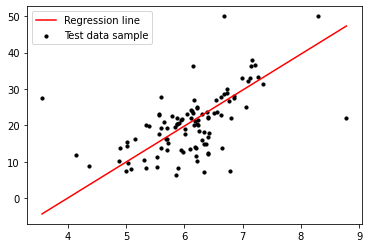

In [21]:
# 결과 시각화 하기
# x축, y축 필요
line_x = np.linspace(np.min(X_test['RM']), np.max(X_test['RM']), 10) #최소, 최고사이의 간격 10등분
line_y = sim_lr.predict(line_x.reshape(-1,1))

plt.scatter(X_test['RM'], y_test, s=10, c='black')
plt.plot(line_x, line_y, c='red')
plt.legend(['Regression line','Test data sample'], loc='upper left')
#plt.legend 복습하기

In [22]:
# Multiple Linear Regression 여러 인자를 고려하여 시각화
# 별도의 기능을 사용하는게 아니라 단순히 columns을 더 많이 사용
mul_lr = LinearRegression()
mul_lr.fit(X_train,y_train)  # X_train의 모든 칼럼과 label train 데이터로 학습

LinearRegression()

In [23]:
y_pred = mul_lr.predict(X_test) #X_test로 예측

In [24]:
# 다중 선형 회귀
print('다중 선형 회귀, R2: {:.4f}'.format(r2_score(y_test, y_pred)))

다중 선형 회귀, R2: 0.6226


In [25]:
# Decision Tree Regressor 결정트리알고리즘
# 결정트리알고리즘을 사용해서 회귀분석에 사용가능
from sklearn.tree import DecisionTreeRegressor
dt_regr = DecisionTreeRegressor(max_depth=4) # max_depth=5 몇 단계까지 내려갈 것인지 결정

In [26]:
#학습

dt_regr.fit(X_train['RM'].values.reshape((-1,1)), y_train)

DecisionTreeRegressor(max_depth=4)

In [27]:
# 예측

y_pred = dt_regr.predict(X_test['RM'].values.reshape(-1,1))

In [28]:
print('단순 결정 트리 회귀 R2: {:.4f}'.format(r2_score(y_test, y_pred)))

단순 결정 트리 회귀 R2: 0.3816


In [29]:
# depth가 많다는건 학습데이터와 밀착이 되기때문에 테스트로 예측이 안된다
# 이게 곧 오버피팅현상
# depth는 데이터와 원하는 결과에 맞게 조정
# 위의 코드를 반복문을 돌려서 가장높은 데이터를 찾아야함

In [30]:
# 반복문 생성을 위한 배열 생성

arr = np.arange(1, 11)
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [31]:
# 반복문 생성

for depth in arr:
  dt_regr = DecisionTreeRegressor(max_depth=depth)
  dt_regr.fit(X_train['RM'].values.reshape((-1,1)), y_train)
  y_pred = dt_regr.predict(X_test['RM'].values.reshape(-1,1))
  print('\n단순 결정 트리 회귀 depth={} R2: {:.4f}'.format(depth, r2_score(y_test, y_pred)))


단순 결정 트리 회귀 depth=1 R2: 0.2459

단순 결정 트리 회귀 depth=2 R2: 0.3547

단순 결정 트리 회귀 depth=3 R2: 0.3931

단순 결정 트리 회귀 depth=4 R2: 0.3816

단순 결정 트리 회귀 depth=5 R2: 0.3247

단순 결정 트리 회귀 depth=6 R2: 0.3474

단순 결정 트리 회귀 depth=7 R2: 0.3164

단순 결정 트리 회귀 depth=8 R2: 0.3368

단순 결정 트리 회귀 depth=9 R2: 0.3098

단순 결정 트리 회귀 depth=10 R2: 0.2579


In [32]:
# 응용 반복문 생성
best_depth = 0
best_r2 = 0

for depth in arr:
  dt_regr = DecisionTreeRegressor(max_depth=depth)
  dt_regr.fit(X_train['RM'].values.reshape((-1,1)), y_train)
  y_pred = dt_regr.predict(X_test['RM'].values.reshape(-1,1))
  
  temp_r2 = r2_score(y_test, y_pred)
  print('\n단순 결정 트리 회귀 depth={} R2: {:.4f}'.format(depth, r2_score(y_test, y_pred)))
  
  if best_r2 < temp_r2:
    best_depth = depth
    best_r2 = temp_r2

print('최적의 결과는 depth={} R2={:.4f}'.format(best_depth, best_r2))


단순 결정 트리 회귀 depth=1 R2: 0.2459

단순 결정 트리 회귀 depth=2 R2: 0.3547

단순 결정 트리 회귀 depth=3 R2: 0.3931

단순 결정 트리 회귀 depth=4 R2: 0.3816

단순 결정 트리 회귀 depth=5 R2: 0.3247

단순 결정 트리 회귀 depth=6 R2: 0.3474

단순 결정 트리 회귀 depth=7 R2: 0.3164

단순 결정 트리 회귀 depth=8 R2: 0.3368

단순 결정 트리 회귀 depth=9 R2: 0.3098

단순 결정 트리 회귀 depth=10 R2: 0.2579
최적의 결과는 depth=3 R2=0.3931


In [33]:
# X전체로 

dt_regr = DecisionTreeRegressor(max_depth=10)
dt_regr.fit(X_train, y_train)

y_pred = dt_regr.predict(X_test)
print('다중 결정 트리 R2: {:.4f}'.format(r2_score(y_test, y_pred)))

다중 결정 트리 R2: 0.7391


In [34]:
best_depth = 0
best_r2 = 0

for depth in arr:
  dt_regr = DecisionTreeRegressor(max_depth=10)
  dt_regr.fit(X_train, y_train)

  y_pred = dt_regr.predict(X_test)
  #print('다중 결정 트리 R2: {:.4f}'.format(r2_score(y_test, y_pred)))
  
  temp_r2 = r2_score(y_test, y_pred)
  #print('\n단순 결정 트리 회귀 depth={} R2: {:.4f}'.format(depth, r2_score(y_test, y_pred)))
  
  if best_r2 < temp_r2:
    best_depth = depth
    best_r2 = temp_r2

print('최적의 결과는 depth={} r2={:.4f}'.format(best_depth, best_r2))

최적의 결과는 depth=10 r2=0.7525


방금 했던 다중결정트리(X전체) 반복문 돌린 코드에서 돌릴때마다 최고 R2랑 depth가 바뀌는데 인자가 많아서 학습할 때 마다 학습결과가 바뀌는 거라고 이해하면 될까요?


-R2 값을 돌릴때마다 조건이 변하기 때문

스플릿에 랜덤 스테이트 값도 영향을 많이 주나요?
-데이터의 종류와 균일도에 따라서 달라진다

In [35]:
# Support Vector machine Regressor (SVM)
# 옵선 중 C= 최대몇개를 무시할껀지
# SVM 회귀 특성상 분류에도 사용가능하고 회귀에도 사용할수있다

from sklearn.svm import SVR
svm_regr = SVR() 

svm_regr.fit(X_train['RM'].values.reshape(-1,1), y_train)     # 학습
y_pred = svm_regr.predict(X_test['RM'].values.reshape(-1,1))  # 예측

print('단순 서포트 벡터 머신 회귀 R2: {:.4f}'.format(r2_score(y_test, y_pred)))

단순 서포트 벡터 머신 회귀 R2: 0.3763


In [36]:
## 테스트
svm_regr.fit(X_train, y_train)     # 학습
y_pred = svm_regr.predict(X_test)  # 예측

print('단순 서포트 벡터 머신 회귀 R2: {:.4f}'.format(r2_score(y_test, y_pred)))

단순 서포트 벡터 머신 회귀 R2: 0.3081


In [37]:
# SVM 옵션설정해보기

svm_regr = SVR(C=2) 
svm_regr.fit(X_train['RM'].values.reshape(-1,1), y_train)     # 학습
y_pred = svm_regr.predict(X_test['RM'].values.reshape(-1,1))  # 예측

print('단순 서포트 벡터 머신 회귀 R2: {:.4f}'.format(r2_score(y_test, y_pred)))

단순 서포트 벡터 머신 회귀 R2: 0.4202


In [38]:
svm_regr = SVR(C=1)
svm_regr.fit(X_train['RM'].values.reshape(-1,1), y_train)     # 학습
y_pred = svm_regr.predict(X_test['RM'].values.reshape(-1,1))  # 예측

print('단순 서포트 벡터 머신 회귀 R2: {:.4f}'.format(r2_score(y_test, y_pred)))

단순 서포트 벡터 머신 회귀 R2: 0.3763


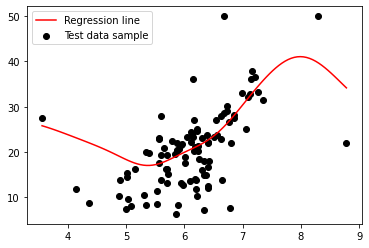

In [39]:
# 결과 시각화
line_x = np.linspace(np.min(X_test['RM']), np.max(X_test['RM']), 100)
line_y = svm_regr.predict(line_x.reshape(-1, 1))

plt.scatter(X_test['RM'], y_test, c='black')
plt.plot(line_x, line_y, c='red')
plt.legend(['Regression line', 'Test data sample'], loc='upper left')

In [40]:
svm_regr = SVR(C=0.0001)
svm_regr.fit(X_train, y_train)
y_pred = svm_regr.predict(X_test)  # 예측

print('단순 서포트 벡터 머신 회귀 R2: {:.2f}'.format(r2_score(y_test, y_pred)*100))


단순 서포트 벡터 머신 회귀 R2: -1.06



# 반복문을 사용해서 최적의 C값을 찾는 숙제

In [41]:
arr = np.arange(6570, 6585)
# print(arr)
best_C = 0
best_r2 = 0

for C_var in arr:
  svm_regr = SVR(C = C_var)
  svm_regr.fit(X_train, y_train)
  y_pred = svm_regr.predict(X_test)
  
  temp_r2 = r2_score(y_test, y_pred)
  print('\n서포트 벡터 머신 C={} R2: {:.4f}'.format(C_var, r2_score(y_test, y_pred)))
  

  if best_r2 < temp_r2:
    
    best_C = C_var
    best_r2 = temp_r2

print('최적의 결과는 C={} r2={:.4f}'.format(best_C, best_r2))

# for depth in arr:
#   dt_regr = DecisionTreeRegressor(max_depth=10)
#   dt_regr.fit(X_train, y_train)


단순 결정 트리 회귀 C=6570 R2: 0.6804

단순 결정 트리 회귀 C=6571 R2: 0.6804

단순 결정 트리 회귀 C=6572 R2: 0.6804

단순 결정 트리 회귀 C=6573 R2: 0.6804

단순 결정 트리 회귀 C=6574 R2: 0.6804

단순 결정 트리 회귀 C=6575 R2: 0.6804

단순 결정 트리 회귀 C=6576 R2: 0.6804

단순 결정 트리 회귀 C=6577 R2: 0.6804

단순 결정 트리 회귀 C=6578 R2: 0.6804

단순 결정 트리 회귀 C=6579 R2: 0.6804

단순 결정 트리 회귀 C=6580 R2: 0.6805

단순 결정 트리 회귀 C=6581 R2: 0.6805

단순 결정 트리 회귀 C=6582 R2: 0.6805

단순 결정 트리 회귀 C=6583 R2: 0.6805

단순 결정 트리 회귀 C=6584 R2: 0.6805
최적의 결과는 C=6582 r2=0.6805


In [42]:
arr1 = np.arange(100,102)
arr1

array([100, 101])

In [43]:
x = 506*13
x

6578

최적의 결과는 C=4999 r2=0.6759


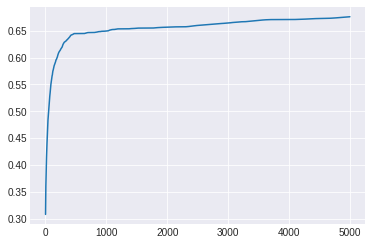

In [51]:
# Case1_test1 = arr_C와 arr_r2 상관관계 파악
sPoint = 1
ePoint = 5000

arr_C = np.empty((0, ePoint))
arr_r2 = np.empty((0, ePoint))
arr = np.arange(sPoint, ePoint)

best_C = 0
best_r2 = 0

for C_var in arr:
  svm_regr = SVR(C = C_var)
  svm_regr.fit(X_train, y_train)
  y_pred = svm_regr.predict(X_test)
  
  temp_r2 = r2_score(y_test, y_pred)  

  if best_r2 < temp_r2:
    arr_C = np.append(arr_C, np.array([C_var]))
    # print(arr_C)
    arr_r2 = np.append(arr_r2, np.array([temp_r2]))
    # print(arr_r2)

    best_C = C_var
    best_r2 = temp_r2

print('최적의 결과는 C={} r2={:.4f}'.format(best_C, best_r2))
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
x = arr_C
y = arr_r2
plt.plot(x,y)

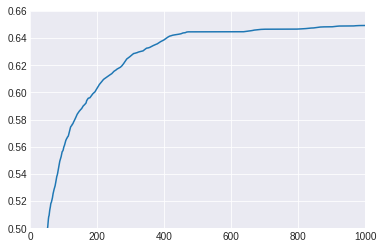

In [46]:
plt.plot(x,y)
plt.xlim(0, 1000)
plt.ylim(0.5, 0.66)

def numerical_diff(f,x):
  h = 1e-4
  return (f(x+h)-f(x-h))/2*h

C 400 R2 0.64

In [93]:
# Multi Layer Perceptron Regressor

from sklearn.neural_network import MLPRegressor
mlp_regr = MLPRegressor(solver='adam', hidden_layer_sizes=200, max_iter=1000)    #MLPRegressor() Solver= lbfgs, sgd, adam

mlp_regr.fit(X_train, y_train)
y_pred = mlp_regr.predict(X_test)

print('다중 MLP 회귀, R2: {:.4f}'.format(r2_score(y_test, y_pred)))

다중 MLP 회귀, R2: 0.3551
